In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
for dirname, _, filenames in os.walk('/content/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/Sitar, Bansuri Tabla trio  Rishab Prasanna & Sandip Banerjee & Nicolas Delaigue.mid
/content/Morning Meditation Ragas On Sitar - Peaceful Music for Relaxation - B. Sivaramakrishna Rao.mid
/content/Heal Ragas __ flute and sitar by Hariprasad chorsia__ calm mind__ Thumri in raag bhairavi.mid
/content/Pandit Ravi Shankar - Morning Meditation Ragas On Sitar  Indian Classical Instrumental Music.mid
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/.last_opt_in_prompt.yaml
/content/.config/default_configs.db
/content/.config/.last_survey_prompt.yaml
/content/.config/.last_update_check.json
/content/.config/gce
/content/.config/configurations/config_default
/content/.config/logs/2023.12.04/14.20.49.627769.log
/content/.config/logs/2023.12.04/14.23.49.652015.log
/content/.config/logs/2023.12.04/14.23.59.638040.log
/content/.config/logs/2023.12.04/14.26.59.279282.log
/content/.config/logs/2023.12.04/14.27.00.107426.log
/content/.config/logs/2023.12.04/14.

In [2]:
!pip install music21

In [3]:
from music21 import *
def read_midi(file):

    print("Loading Music File:",file)

    notes=[]
    notes_to_parse = None

    #parsing a midi file
    midi = converter.parse(file)

    #grouping based on different instruments
    s2 = instrument.partitionByInstrument(midi)

    #Looping over all the instruments
    for part in s2.parts:

        #select elements of only piano
        if 'Piano' in str(part):

            notes_to_parse = part.recurse()

            #finding whether a particular element is note or a chord
            for element in notes_to_parse:

                #note
                if isinstance(element, note.Note):
                    notes.append(str(element.pitch))

                #chord
                elif isinstance(element, chord.Chord):
                    notes.append('.'.join(str(n) for n in element.normalOrder))

    return np.array(notes)

In [4]:
#for listing down the file names
import os

#Array Processing
import numpy as np

#specify the path
path='/content/'

#read all the filenames
files=[i for i in os.listdir(path) if i.endswith(".mid")]

#reading each midi file
notes_array = np.array([read_midi(path+i) for i in files])


Loading Music File: /content/Sitar, Bansuri Tabla trio  Rishab Prasanna & Sandip Banerjee & Nicolas Delaigue.mid
Loading Music File: /content/Morning Meditation Ragas On Sitar - Peaceful Music for Relaxation - B. Sivaramakrishna Rao.mid
Loading Music File: /content/Heal Ragas __ flute and sitar by Hariprasad chorsia__ calm mind__ Thumri in raag bhairavi.mid
Loading Music File: /content/Pandit Ravi Shankar - Morning Meditation Ragas On Sitar  Indian Classical Instrumental Music.mid


<ipython-input-4-1c587396b50b>:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  notes_array = np.array([read_midi(path+i) for i in files])


In [5]:
#converting 2D array into 1D array
notes_ = [element for note_ in notes_array for element in note_]
#No. of unique notes
unique_notes = list(set(notes_))
print(len(unique_notes))
# unique_notes

4014


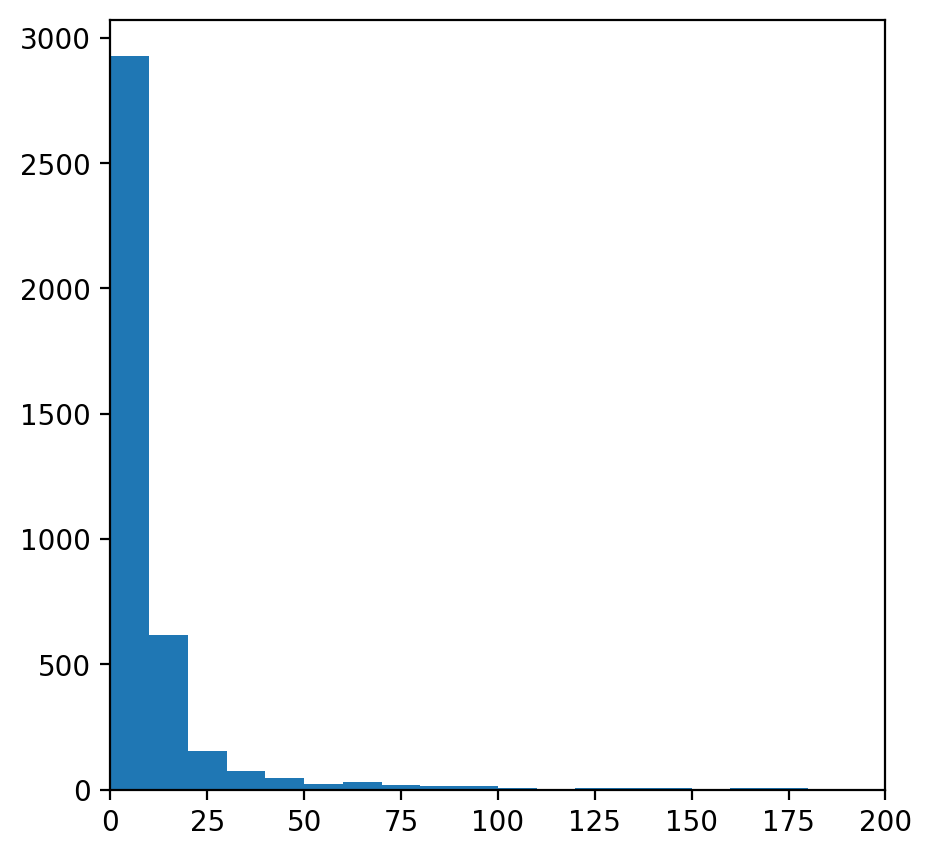

In [6]:
#importing library
from collections import Counter

#computing frequency of each note
freq = dict(Counter(notes_))

#library for visualiation
import matplotlib.pyplot as plt

#consider only the frequencies
no=[count for _,count in freq.items()]

#set the figure size
plt.figure(figsize=(5,5))

bins = [i * 10 for i in range(int(max(no) // 10) + 2)]

#plot
plt.hist(no, bins = bins)

plt.xlim(0, 200)

plt.show()

In [7]:
frequent_notes = [note_ for note_, count in freq.items() if count>= 20]
print(len(frequent_notes))

472


In [8]:
new_music=[]

for notes in notes_array:
    temp=[]
    for note_ in notes:
        if note_ in frequent_notes:
            temp.append(note_)
    new_music.append(temp)

new_music = np.array(new_music)

<ipython-input-8-3eb6be2fd841>:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  new_music = np.array(new_music)


In [18]:
no_of_timesteps = 64
x = []
y = []

for note_ in new_music:
    for i in range(0, len(note_) - no_of_timesteps, 1):

        #preparing input and output sequences
        input_ = note_[i:i + no_of_timesteps]
        output = note_[i + no_of_timesteps]

        x.append(input_)
        y.append(output)

x=np.array(x)
y=np.array(y)
print(x.shape, y.shape)
print(x)
print(y)

(43217, 64) (43217,)
[['2.4.9' '3.5.6' 'D4' ... '4.9' 'D5' 'A6']
 ['3.5.6' 'D4' 'C#2' ... 'D5' 'A6' 'D7']
 ['D4' 'C#2' '9.2' ... 'A6' 'D7' '6']
 ...
 ['1.4' '10.3' '10.1' ... 'B3' 'E-7' 'B3']
 ['10.3' '10.1' '10.11.3' ... 'E-7' 'B3' '11']
 ['10.1' '10.11.3' '1.2.4' ... 'B3' '11' 'F#5']]
['D7' '6' 'A4' ... '11' 'F#5' '11']


In [19]:
unique_x = list(set(x.ravel()))
x_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_x))
print(unique_x)

['3.8', '6', '3.4.7', '4.6.8', '4.7.8.9.11', 'D6', 'F4', '3.4.5.6.7.8.9.10.11.1', 'F#5', '4.7.8', '1.2.3.4.5.7.8.9.10.11', '8.11.1.3', '2.4.6.9', '1.5.8', '3.4.8.11', '3.6', '8.11.1', '10.2.5', 'A5', '11.2', '1.4.8', '4.6.7.11', '3.4.5', '6.7.8.9', 'D7', '8.11.3', '7.8', '6.9.11.2', '1.2.3.4.6.7.8.9.10', '1.2.4.6.7', '1.3', '6.8', '3.5.8.9', '10.2.3.4.5', '11.1', '6.7.8', '2.3.8', '3.5', '3', '4.5.6.7.8.9.10.11.0.1.2', '3.9', '4.5.6.7.8.9.11.0.1.2', '10.2.4', '1.2.3.4.5.6.8.9.10.11', '4.8.9.11', '6.7.9', '4.7.8.9', '2.3.4.5.6.7.8.9.10.0', '1.5.9', '10.1.3', '4.5.10', '11.0.1', '0.1.2.3.4.5.6.7.9.10', '1.2.3.4.5.6.7.9.10.11', 'E-4', '1.4', '6.10.1.2', '2.4', '6.7.8.9.10.11.0.1.2.3.4', '5.8', '4.9.10', '1.5', '4.6', 'C6', '4.8', '8.0.1', '4.5.8.9', 'E-5', '10.1.5', '9.0.3.5', '11.0.4', '4.5.6.7.8.9.10.11.1.2', '4.5.6.7.8', 'A2', '5.8.11.1', '1.2.5', '1.5.6.7', '9.11.0', '1.2.5.6.7.9', '1.2.3.4.5', '7.11.2', '2.4.5.9', '8.9.10', '11.1.3.5', '6.8.11', '11.1.6', '10.11', '0.4.5', '8.9.1', '

In [20]:
#preparing input sequences
x_seq=[]
for i in x:
    temp=[]
    for j in i:
        #assigning unique integer to every note
        temp.append(x_note_to_int[j])
    x_seq.append(temp)

x_seq = np.array(x_seq)
x_seq

array([[362, 333, 371, ..., 153, 409,  98],
       [333, 371, 243, ..., 409,  98,  24],
       [371, 243, 275, ...,  98,  24,   1],
       ...,
       [ 55, 412, 403, ..., 285, 420, 285],
       [412, 403, 251, ..., 420, 285, 261],
       [403, 251, 434, ..., 285, 261,   8]])

In [21]:
unique_y = list(set(y))
y_note_to_int = dict((note_, number) for number, note_ in enumerate(unique_y))
y_seq=np.array([y_note_to_int[i] for i in y])
y_seq

array([ 24,   1, 408, ..., 261,   8, 261])

In [22]:
from sklearn.model_selection import train_test_split
x_tr, x_val, y_tr, y_val = train_test_split(x_seq,y_seq,test_size=0.2,random_state=0)

In [ ]:
# def lstm():
#   model = Sequential()
#   model.add(LSTM(128,return_sequences=True))
#   model.add(LSTM(128))
#   model.add(Dense(256))
#   model.add(Activation('relu'))
#   model.add(Dense(n_vocab))
#   model.add(Activation('softmax'))
#   model.compile(loss='sparse_categorical_crossentropy', optimizer='adam')
#   return model

In [27]:
from keras.layers import (Dense,
                            Flatten,Conv1D,Embedding,MaxPool1D,Dropout,GlobalMaxPool1D)
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
# import keras.backend as K

# K.clear_session()
model = Sequential()

#embedding layer
model.add(Embedding(len(unique_x), 100, input_length=64,trainable=True))

model.add(Conv1D(64,3, padding='causal',activation='relu'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(128,3,activation='relu',dilation_rate=2,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

model.add(Conv1D(256,3,activation='relu',dilation_rate=4,padding='causal'))
model.add(Dropout(0.2))
model.add(MaxPool1D(2))

#model.add(Conv1D(256,5,activation='relu'))
model.add(GlobalMaxPool1D())

model.add(Dense(256, activation='relu'))
model.add(Dense(len(unique_y), activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['acc'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 64, 100)           47200     
                                                                 
 conv1d_6 (Conv1D)           (None, 64, 64)            19264     
                                                                 
 dropout_6 (Dropout)         (None, 64, 64)            0         
                                                                 
 max_pooling1d_6 (MaxPoolin  (None, 32, 64)            0         
 g1D)                                                            
                                                                 
 conv1d_7 (Conv1D)           (None, 32, 128)           24704     
                                                                 
 dropout_7 (Dropout)         (None, 32, 128)           0         
                                                      

In [28]:
mc=ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', save_best_only=True,verbose=1)

In [29]:
from keras.callbacks import ModelCheckpoint
filepath = "../working/saved_models-improvement-{epoch:02d}-{val_acc:.2f}.h5"
checkpoint = ModelCheckpoint(filepath,monitor = 'val_acc',verbose = 1,save_best_only = True,mode = 'max')
callbacks_list = [checkpoint]

In [31]:
history = model.fit(np.array(x_tr),np.array(y_tr),batch_size=128,epochs=100, validation_data=(np.array(x_val),np.array(y_val)),verbose=1)

Epoch 1/100
271/271 [==============================] - 37s 135ms/step - loss: 4.7814 - acc: 0.0852 - val_loss: 5.0076 - val_acc: 0.0828
Epoch 2/100
271/271 [==============================] - 38s 139ms/step - loss: 4.7491 - acc: 0.0871 - val_loss: 4.9658 - val_acc: 0.0860
Epoch 3/100
271/271 [==============================] - 37s 135ms/step - loss: 4.7212 - acc: 0.0866 - val_loss: 4.9618 - val_acc: 0.0875
Epoch 4/100
271/271 [==============================] - 37s 136ms/step - loss: 4.6936 - acc: 0.0902 - val_loss: 4.9463 - val_acc: 0.0875
Epoch 5/100
271/271 [==============================] - 36s 135ms/step - loss: 4.6605 - acc: 0.0915 - val_loss: 4.9649 - val_acc: 0.0897
Epoch 6/100
271/271 [==============================] - 37s 136ms/step - loss: 4.6296 - acc: 0.0932 - val_loss: 4.9304 - val_acc: 0.0887
Epoch 7/100
271/271 [==============================] - 36s 134ms/step - loss: 4.5949 - acc: 0.0938 - val_loss: 4.9303 - val_acc: 0.0898
Epoch 8/100
271/271 [===========================

In [ ]:
# #loading best model
# from keras.models import load_model
# model = load_model('best_model.h5')

In [ ]:
len(x_val)
x_val

array([[1958, 1829,  269, ..., 1123, 1578,  334],
       [ 431, 1748,  797, ...,  585, 1293, 1290],
       [  77, 1700, 1293, ...,  652, 1463,  613],
       ...,
       [ 549, 1947, 1724, ...,  549,  352,  191],
       [1941,  585,  398, ..., 1371, 1123, 1669],
       [ 585, 1280, 1448, ..., 1305,  549, 1870]])

In [ ]:
import random
ind = np.random.randint(0,len(x_val)-1)

random_music = x_val[ind]

predictions=[]
for i in range(25):

    random_music = random_music.reshape(1,no_of_timesteps)

    prob  = model.predict(random_music)[0]
    r = random.randrange(0,2)
    if (r == 0):
        y_pred= np.argmax(prob,axis=0)
    else:
        max_index = np.argmax(prob)
        prob[max_index] = -np.inf
        y_pred = np.argmax(prob,axis=0)
    predictions.append(y_pred)

    random_music = np.insert(random_music[0],len(random_music[0]),y_pred)
    random_music = random_music[1:]

print(predictions)

1/1 [==============================] - 0s 22ms/step
[1293, 1293, 1293, 1229, 1229, 1229, 1229, 1293, 1620, 585, 1293, 1293, 1293, 585, 1293, 1293, 1293, 585, 1293, 585, 536, 585, 1620, 585, 585]


In [ ]:
random_music

array([1720, 1293,  952, 1737, 1063, 1448, 1811, 1293, 1293, 1293, 1229,
       1229, 1229, 1229, 1293, 1620,  585, 1293, 1293, 1293,  585, 1293,
       1293, 1293,  585, 1293,  585,  536,  585, 1620,  585,  585])

In [ ]:
x_int_to_note = dict((number, note_) for number, note_ in enumerate(unique_x))
predicted_notes = [x_int_to_note[i] for i in predictions]
predicted_notes

['D5',
 'D5',
 'D5',
 'C#5',
 'C#5',
 'C#5',
 'C#5',
 'D5',
 '9.2',
 'A5',
 'D5',
 'D5',
 'D5',
 'A5',
 'D5',
 'D5',
 'D5',
 'A5',
 'D5',
 'A5',
 'C5',
 'A5',
 '9.2',
 'A5',
 'A5']

In [ ]:
from music21 import note, chord, instrument, stream, tempo

def convert_to_midi(prediction_output):

    offset = 0
    output_notes = []
    midi_stream = stream.Stream()

    # create note and chord objects based on the values generated by the model
    for pattern in prediction_output:

        # pattern is a chord
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:

                cn=int(current_note)
                new_note = note.Note(cn)
                new_note.storedInstrument = instrument.Banjo()
                notes.append(new_note)

            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)

        # pattern is a note
        else:

            new_note = note.Note(pattern)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Banjo()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += 1
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

convert_to_midi(predicted_notes)

In [ ]:
predicted_notes

['A5',
 'A5',
 'A5',
 'A5',
 'A5',
 'C5',
 'C5',
 '9.2',
 'A5',
 'A5',
 '9.2',
 '2.7',
 '9.2',
 'D6',
 'A5',
 'C#5',
 '2.4',
 'C#5',
 'E5',
 'E5',
 'A3',
 'A5',
 '2.4',
 'A5',
 'A5']

In [ ]:
from music21 import note, chord, instrument, stream

def convert_to_midi(prediction_output, note_duration=1.0):
    offset = 0
    output_notes = []
    midi_stream = stream.Stream()

    # Logic to condense repeated notes and their durations
    condensed_notes = []
    current_note = prediction_output[0]
    note_count = 1

    for i in range(1, len(prediction_output)):
        if prediction_output[i] == current_note:
            note_count += 1
        else:
            condensed_notes.append((current_note, note_count * note_duration))
            current_note = prediction_output[i]
            note_count = 1

    # Append the last set of notes
    condensed_notes.append((current_note, note_count * note_duration))

    # create note and chord objects based on the condensed sequence
    for pattern, duration in condensed_notes:
        if ('.' in pattern) or pattern.isdigit():
            notes_in_chord = pattern.split('.')
            notes = []
            for current_note in notes_in_chord:
                cn = int(current_note)
                new_note = note.Note(cn, quarterLength=duration)
                new_note.storedInstrument = instrument.Banjo()
                notes.append(new_note)

            new_chord = chord.Chord(notes)
            new_chord.offset = offset
            output_notes.append(new_chord)
        else:
            new_note = note.Note(pattern, quarterLength=duration)
            new_note.offset = offset
            new_note.storedInstrument = instrument.Banjo()
            output_notes.append(new_note)

        # increase offset each iteration so that notes do not stack
        offset += duration - 1

    # Add the notes to the stream
    midi_stream = stream.Stream(output_notes)
    midi_stream.write('midi', fp='music.mid')

# You can adjust the note duration as needed
convert_to_midi(predicted_notes, note_duration=1.5)  # Use a different note duration if required
